# 🧭 README / Índice — Data Bootcamp Notebook

## Secciones
1. Carga de datos  
2. Limpieza y validación (ETL + Pandera)  
3. Exploración (EDA)  
4. Modelado / Análisis  
5. Validación de resultados  
6. Exportación / Conclusiones


In [6]:
import pandas as pd

# Creamos un DataFrame de ejemplo (simulando un CSV)
data = {
    "invoice_id": ["A001", "A002", "A003", "A004"],
    "date": ["2025-10-15", "2025-10-16", "2025-10-17", "2025-10-18"],
    "amount": [250.0, 400.5, -10.0, 325.75],  # el -10.0 será un valor erróneo para probar validación
    "currency": ["EUR", "USD", "EUR", "GBP"]
}

df = pd.DataFrame(data)
df["date"] = pd.to_datetime(df["date"], utc=True)
df.head()


,invoice_id,date,amount,currency
0,A001,2025-10-15 00:00:00+00:00,250.00,EUR
1,A002,2025-10-16 00:00:00+00:00,400.50,USD
2,A003,2025-10-17 00:00:00+00:00,-10.00,EUR
3,A004,2025-10-18 00:00:00+00:00,325.75,GBP


In [7]:
import pandera as pa
from pandera import Column, Check

# Definimos el esquema de validación
schema = pa.DataFrameSchema({
    "invoice_id": Column(str, Check.str_length(1, 10), unique=True),
    "date": Column(pd.DatetimeTZDtype(tz="UTC")),
    "amount": Column(float, Check.ge(0)),  # >= 0
    "currency": Column(str, Check.isin(["EUR", "USD", "GBP"]))
})

# Validamos el DataFrame
try:
    df_valid = schema.validate(df, lazy=True)
    print("✅ Datos validados correctamente.")
except pa.errors.SchemaErrors as err:
    print("⚠️ Errores detectados en los datos:")
    display(err.failure_cases)







⚠️ Errores detectados en los datos:


,schema_context,column,check,check_number,failure_case,index
0,Column,amount,greater_than_or_equal_to(0),0,-10.0,2


,invoice_id,date,amount,currency
count,4,4,4.000000,4
unique,4,NaN,NaN,3
top,A001,NaN,NaN,EUR
freq,1,NaN,NaN,2
mean,NaN,2025-10-16 12:00:00+00:00,241.562500,NaN
min,NaN,2025-10-15 00:00:00+00:00,-10.000000,NaN
25%,NaN,2025-10-15 18:00:00+00:00,185.000000,NaN
50%,NaN,2025-10-16 12:00:00+00:00,287.875000,NaN
75%,NaN,2025-10-17 06:00:00+00:00,344.437500,NaN
max,NaN,2025-10-18 00:00:00+00:00,400.500000,NaN


currency
EUR    2
USD    1
GBP    1
Name: count, dtype: int64

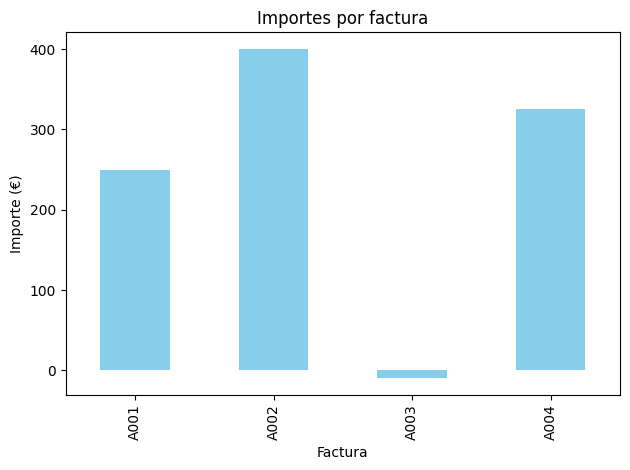

In [8]:
import matplotlib.pyplot as plt

# --- Estadísticas descriptivas ---
display(df.describe(include="all"))

# --- Conteo por moneda ---
display(df["currency"].value_counts())

# --- Gráfico simple de importes por factura ---
df.plot(
    kind="bar",
    x="invoice_id",
    y="amount",
    title="Importes por factura",
    legend=False,
    color="skyblue"
)
plt.ylabel("Importe (€)")
plt.xlabel("Factura")
plt.tight_layout()
plt.show()


In [9]:
from pathlib import Path

# --- Eliminamos valores inválidos (amount < 0) ---
df_clean = df[df["amount"] >= 0].copy()

# --- Validación final ---
assert df_clean["amount"].ge(0).all(), "Hay importes negativos en el dataset limpio."
print("✅ Validación final OK — todos los importes son positivos.")

# --- Exportación ---
output_path = Path("../data/processed/invoices_clean.csv")
output_path.parent.mkdir(parents=True, exist_ok=True)
df_clean.to_csv(output_path, index=False)
print(f"📤 Archivo exportado a: {output_path.resolve()}")


✅ Validación final OK — todos los importes son positivos.
📤 Archivo exportado a: /home/osidev/wsl-projects/python/data-bootcamp/data/processed/invoices_clean.csv
